<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Continuous_Time_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:46:53 Starting...
14:46:53 Installing yfinance into Google notebook...
14:47:03 Installing arch into Google notebook...


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


14:47:15 Initialized.


In [131]:
ticker,begin,end='^GSPC','1928-01-27',today('%Y-%m-%d')
df=download(ticker,begin,end).dropna()
df.index=pd.DatetimeIndex(df.index).to_period('B')
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df['Week']=list(map(lambda x:pd.Period(x,'W'),df.index))
df['Month']=list(map(lambda x:pd.Period(x,'M'),df.index))
df['Year']=list(map(lambda x:pd.Period(x,'Y'),df.index))
df['Decade']=list(map(lambda x:(x.year//10)*10,df.index))
df['WeekDay']=df.index.weekday
df['MonthDay']=df.index.day
df['YearDay']=df.index.day_of_year
df['DecadeDay']=list(map(lambda x:(x-pd.Period("%d-01-01" % ((x.year//10)*10),'B')).n,df.index))
periods=['Week','Month','Year','Decade']

for p in periods:
    df['FirstDay'+p]=(df[p+'Day']<df[p+'Day'].shift())
    df['LastDay'+p]=(df[p+'Day'].shift(-1)<df[p+'Day'])

df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
display(pd.concat([df.head(),df.tail()]).T)

[*********************100%%**********************]  1 of 1 completed


Date,1928-01-30,1928-01-31,1928-02-01,1928-02-02,1928-02-03,2024-01-19,2024-01-22,2024-01-23,2024-01-24,2024-01-25
Open,17.49,17.57,17.530001,17.629999,17.4,4796.279785,4853.419922,4856.799805,4888.560059,4886.660156
High,17.49,17.57,17.530001,17.629999,17.4,4842.069824,4868.410156,4866.47998,4903.680176,4898.149902
Low,17.49,17.57,17.530001,17.629999,17.4,4785.870117,4844.049805,4844.370117,4865.939941,4869.339844
Close,17.49,17.57,17.530001,17.629999,17.4,4839.810059,4850.430176,4864.600098,4868.549805,4894.160156
Adj Close,17.49,17.57,17.530001,17.629999,17.4,4839.810059,4850.430176,4864.600098,4868.549805,4894.160156
Volume,NaN,NaN,NaN,NaN,NaN,4287200000.0,4297610000.0,3912800000.0,4330030000.0,4020430000.0
Daily Return,-1.130587,0.457404,-0.227655,0.570442,-1.304592,1.23135,0.219433,0.292137,0.081193,0.526037
Intraday Return,0.0,0.0,0.0,0.0,0.0,0.907584,-0.061601,0.160606,-0.409328,0.153479
Overnight Return,-1.130587,0.457404,-0.227655,0.570442,-1.304592,0.320854,0.281207,0.131321,0.492537,0.371987
Week,1928-01-30/1928-02-05,1928-01-30/1928-02-05,1928-01-30/1928-02-05,1928-01-30/1928-02-05,1928-01-30/1928-02-05,2024-01-15/2024-01-21,2024-01-22/2024-01-28,2024-01-22/2024-01-28,2024-01-22/2024-01-28,2024-01-22/2024-01-28


<ipython-input-134-a7b889ed38bd>:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plot.set_xlim(df.index[0],df.index[-1])


(1.0, 14105)

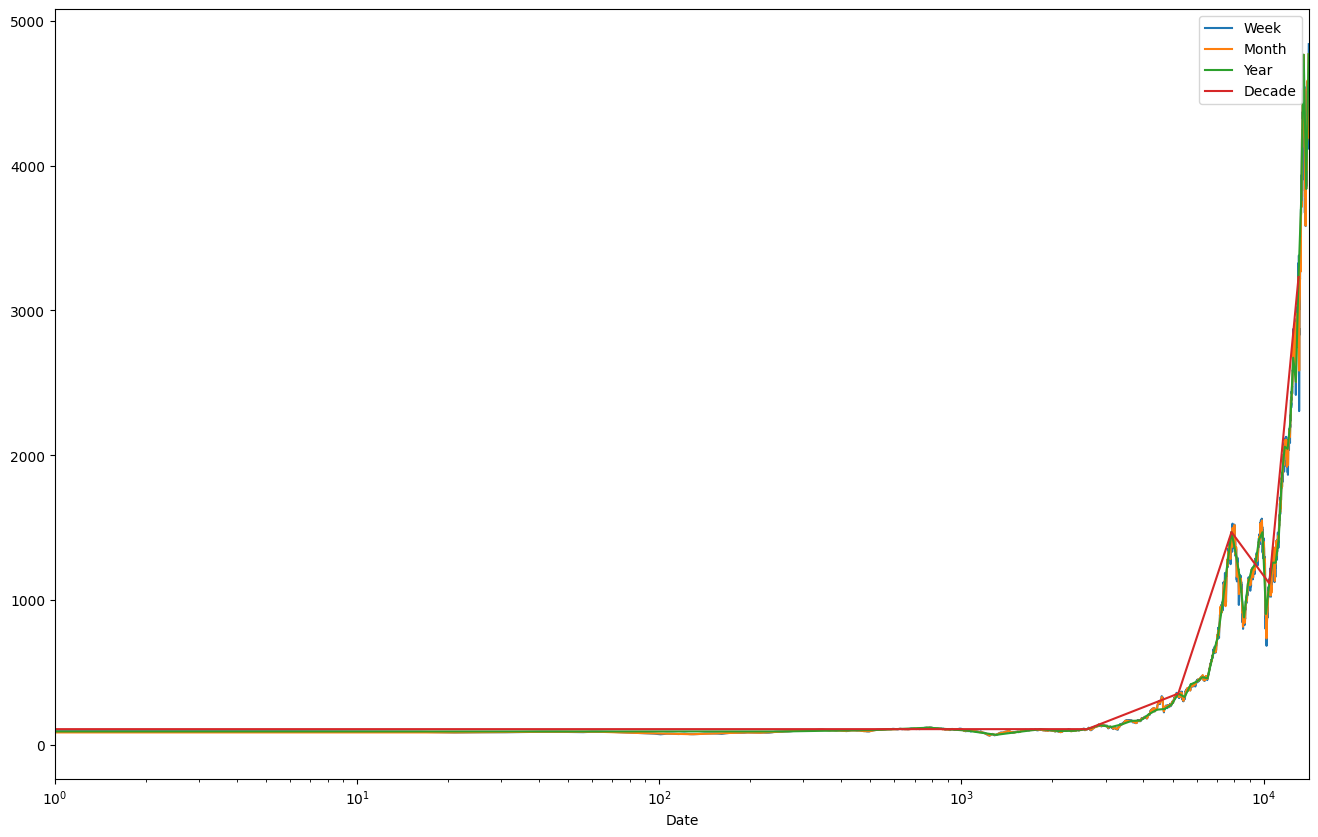

In [134]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))

for p in periods:
  df[df['LastDay'+p]][['Adj Close']].plot(ax=plot)

plot.legend(periods)
#plot.set_xscale('log')
#plot.set_xlim(df.index[0],df.index[-1])

In [127]:
pf=pd.DataFrame({
    "Period":df[df["FirstDayDecade"]]["Decade"],
    "FirstDay":df.index[df["FirstDayDecade"]],
    "FirstClose":df[df["FirstDayDecade"]]["Adj Close"]
}).set_index("Period").join(pd.DataFrame({
    "Period":df[df["LastDayDecade"]]["Decade"],
    "LastDay":df.index[df["LastDayDecade"]],
    "LastClose":df[df["LastDayDecade"]]["Adj Close"]
}).set_index("Period"))
pf["DecadeReturn"]=pf["LastClose"]/pf["FirstClose"]*hundred-hundred
pf

,FirstDay,FirstClose,LastDay,LastClose,DecadeReturn
Period,,,,,
1930,1930-01-02,21.180000,1939-12-29,12.460000,-41.170917
1940,1940-01-02,12.630000,1949-12-30,16.790001,32.937457
1950,1950-01-03,16.660000,1959-12-31,59.889999,259.483793
1960,1960-01-04,59.910000,1969-12-31,92.059998,53.663825
1970,1970-01-02,93.000000,1979-12-31,107.940002,16.064519
1980,1980-01-02,105.760002,1989-12-29,353.399994,234.152786
1990,1990-01-02,359.690002,1999-12-31,1469.250000,308.476741
2000,2000-01-03,1455.219971,2009-12-31,1115.099976,-23.372411
2010,2010-01-04,1132.989990,2019-12-31,3230.780029,185.155214


In [124]:
df.index[df["LastDayDecade"]]

PeriodIndex(['1929-12-31', '1939-12-29', '1949-12-30', '1959-12-31',
             '1969-12-31', '1979-12-31', '1989-12-29', '1999-12-31',
             '2009-12-31', '2019-12-31'],
            dtype='period[B]', name='Date')

In [92]:
dir(df.loc[df.index[0],'DecadeDay'])

['__add__',
 '__array_priority__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '_adjust_dst',
 '_apply',
 '_apply_array',
 '_attributes',
 '_cache',
 '_day_opt',
 '_deprecations',
 '_from_name',
 '_get_offset_day',
 '_init_custom',
 '_offset',
 '_offset_str',
 '_params',
 '_period_dtype_code',
 '_prefix',
 '_repr_attrs',
 '_use_relativedelta',
 '_validate_n',
 'apply',
 'apply_index',
 'base',
 'calendar',
 'copy',
 'freqstr',
 'holidays',
 'isAnchored',
 'is_anchored',
 'is_month_end',
 'is_month_start',
 'is_on_offset',
 '